# MNIST Handwritten Digit Classification

In [ ]:
import os

print(os.getcwd())

/content


In [ ]:
# !pip install certifi
# !python3 -m certifi

In [ ]:
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [ ]:

# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import cv2
from keras.models import load_model
from numpy import argmax

## Load MNIST Dataset

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


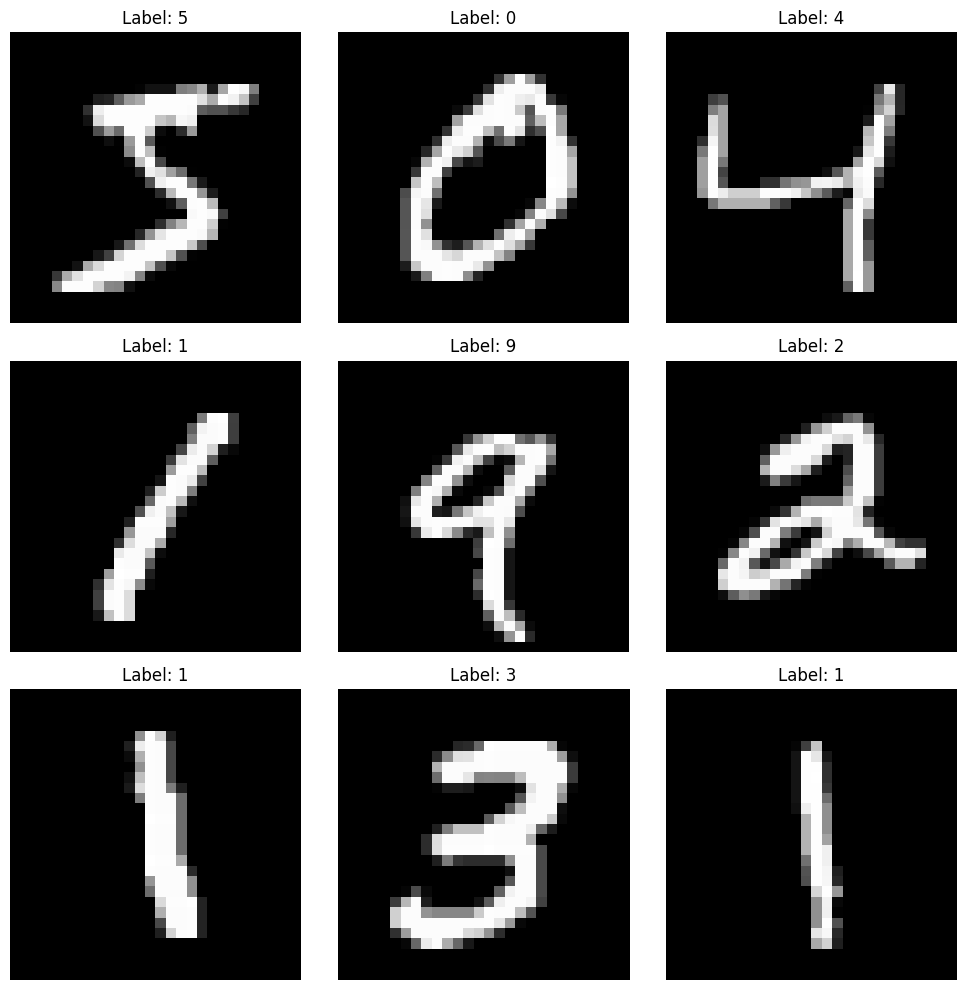

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Load the .npz file
data = np.load(os.path.join('mnist.npz'))

# Extract arrays from the .npz file
train_images = data['x_train']
train_labels = data['y_train']
test_images = data['x_test']
test_labels = data['y_test']

# Summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

# Plot first few images
plt.figure(figsize=(10, 10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# define cnn model

def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dropout(0.2))
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
 return model

## Save Final Model

In [ ]:

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# record model performance on a validation dataset during training
model = define_model()
history = model.fit(train_images,train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=32)
# save model
model.save('final_model.h5')

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 105.0321 - categorical_accuracy: 0.2468 - val_loss: 32.9252 - val_categorical_accuracy: 0.5292
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 45.2219 - categorical_accuracy: 0.4900 - val_loss: 16.5946 - val_categorical_accuracy: 0.7168
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 30.6935 - categorical_accuracy: 0.6057 - val_loss: 11.8559 - val_categorical_accuracy: 0.7865
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 24.5526 - categorical_accuracy: 0.6649 - val_loss: 9.6464 - val_categorical_accuracy: 0.8214
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 20.5124 - categorical_accuracy: 0.7052 - val_loss: 8.6728 - val_categorical_accuracy: 0.8371
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 17.9306 - categorical_accuracy: 0.7294 - val_loss: 7.6990 - val_categorical

In [ ]:
# count train_labels  == 1
count = 0
for label in train_labels:
    if np.argmax(label) == 0:
        count += 1
print(count)

5923


In [ ]:

def load_image(filename):
    # Load the image in grayscale
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Dilate
    kernel = np.ones((3, 3), np.uint8)
    img = cv2.erode(img, kernel, iterations=2)
    #inverse image
    img = 255 - img

    plt.imshow(img, cmap='gray')
    plt.show()

    if img is None:
        raise FileNotFoundError(f"Image at path '{filename}' could not be loaded.")

    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))

    # Reshape the image to the shape required by the model
    img = img.reshape(1, 28, 28, 1)

    # Convert the image to float32 and normalize the pixel values to the range [0, 1]
    img = img.astype('float32')
    img = img / 255.0

    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('6.png')
    plt.imshow(img[0], cmap='gray')
    plt.show()
    # load model
    model = load_model('final_model.h5')
    # predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)

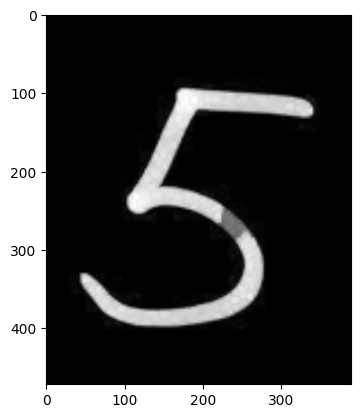

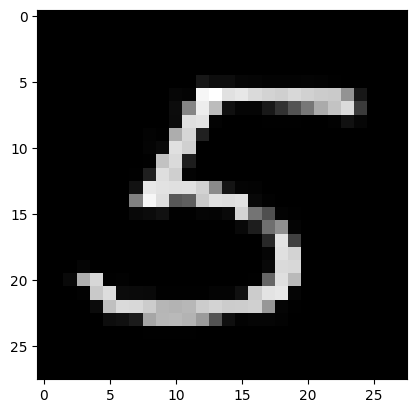

1/1 [==============================] - 0s 51ms/step
5


In [ ]:
# Entry point, run the example
if __name__ == "__main__":
    run_example()